## Class 1
Revising basics of pandas and seaborn  
Revising basic statistical tests  
Examining sources of error in data  

### How reliable is your data?

Much has been made of a link between brain size and intelligence. We will test this by correalating head circumference with the marks in the warm-up quiz

### Method. 
Each group of 5 should have a tape measure.  
Two people should each measure the heads of everyone in the group and everyone in the group beside you.  
Wrap the tape measure around just above the ears.  
Everyone will get measured 4 times.  Be fast!

### Data Entry. 
Make a python dataframe for your data from lists of Measurer, Group, Group-member, Head_diameter

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

Enter your data into python lists.   Just replace the numbers and names here with your own.  Use your group names in stead of 'us' and 'them'

In [2]:
Group_member = ['Aaron', 'Alice', 'Charlie', 'Thibauld', 'Thu', 'Pakkapol', 'Saima', 'Hillary', 'Faye', 'Xiao-feng']
Group = ['us', 'us', 'us', 'us', 'us', 'them','them','them','them','them']
Charlie_measure = [56,58,51,55,52,50,54,53,58,57,]
Thu_measure = [56,57,52,56,51,52,55,54,57,57]

Combine lists into a dataframe

In [3]:
zipped = list(zip(Group_member, Group, Charlie_measure, Thu_measure ))
df = pd.DataFrame(zipped, columns=['Group_member', 'Group', 'Charlie', 'Thu'])

We now have a pandas dataframe.  It has an index running along the left hand, column names on the top.  There are useful functions for checking and summarising it.

#### Check things look right

In [4]:
df.shape

(10, 4)

In [17]:
df.head(3)

,Group_member,Group,Charlie,Thu
0,Aaron,us,56,56
1,Alice,us,58,57
2,Charlie,us,51,52


Summarising

In [ ]:
df.describe()

You can get just single statistics for each column

In [ ]:
df.mean()

In [ ]:
df.max()

Each column in the dataframe is a series.  This is a bit like a python list, but has an order, index and, like dataframes, there are functions to describe and summarise them.  A series can be called in different ways.  It can be assigned to a variable:

In [20]:
P = df['Thu']

In [21]:
max(P)

57

In [22]:
P.max()

57

Or called directly within a function, either explictly:

In [23]:
max(df['Thu'])

57

Or simply (if the column. name has no spaces, or odd characters)

In [24]:
max(df.Thu)

57

Other functions you can use to summarise a series:  
    
    P.min()
    P.mean()
    P.median()
    P.std()
    P.skew()
    P.quantile(0.5)
    P.nlargest(3)
    P.sample(2)
    P.head(3
    P.value_counts()
    
    

### Do we have reliable measures?

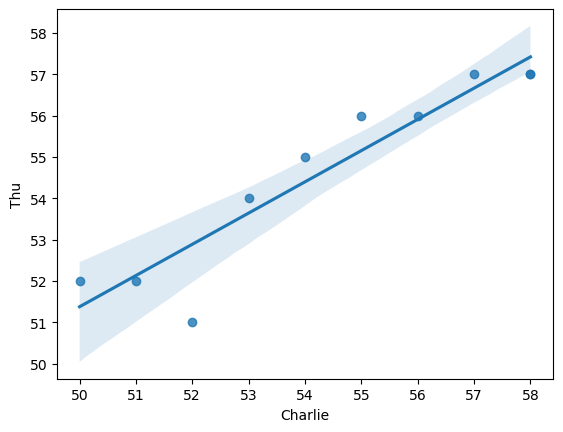

In [25]:
ax = sns.regplot(x="Charlie", y="Thu", data=df)

Are there significant differeneces between the measures by each person?  You will remember from last year that we can use a paired t test for this.

#### Paired t test
Assumptions:  
Continous dependent variable  
Independant observations   
Normally distributed dependent variable (at least largely - the test is quite robust to this)  
No major outliers  

We should start by plotting the data and checking normalcy

<AxesSubplot:xlabel='Charlie', ylabel='Count'>

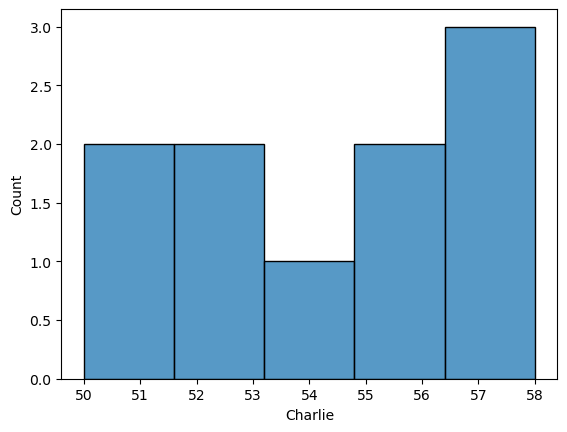

In [26]:
sns.histplot(data=df, x='Charlie')

Not looking very normal...

In [28]:
# test for P's measures
stat, p = shapiro(df['Charlie']) 

print(f'Statistics = {stat:.3f}, p = {p:.3f}') 


alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.942, p=0.578
Sample looks Gaussian (fail to reject H0)


<AxesSubplot:xlabel='Thu', ylabel='Count'>

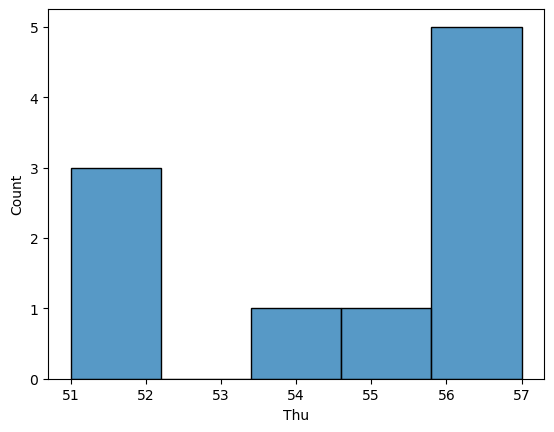

In [29]:
sns.histplot(data=df, x='Thu')

In [30]:
# test for C's measures
stat, p = shapiro(df['Thu']) 

print(f'Statistics = {stat:.3f}, p = {p:.3f}') 

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.863, p=0.084
Sample looks Gaussian (fail to reject H0)


In [31]:
stats.ttest_rel(df['Charlie'], df['Thu'])

Ttest_relResult(statistic=-0.8955334711889903, pvalue=0.39382281469156144)

Cannot reject the null hypothesis - the two sets of measurements are not significantly different

#### Average the two measurements
As the two measures are not significantly different we'll average them and make a new column of this in the dataframe

In [32]:
df['Av_diameter'] = df[['Charlie','Thu']].mean(axis=1)

In [33]:
df.head(3)

,Group_member,Group,Charlie,Thu,Av_diameter
0,Aaron,us,56,56,56.0
1,Alice,us,58,57,57.5
2,Charlie,us,51,52,51.5


The averages will be gathered by denomstrators, along with quiz marks.  These are anonymous!

### Whole-class data gathering

Demonstrators will enter all the data into a sharepoint document which can be read in using this code (once it is complete!).  

Data is:
Student_Group, Student_number, Head_Size_cm, Quiz_Score

In [20]:
#download shared group data
 
import requests
import pandas as pd
 
file_url = 'https://uoe-my.sharepoint.com/:x:/g/personal/ckidner_ed_ac_uk/EWOdw-R6PTFOhgM8RkdP1dkB61N7-Z-gaOuRXFdPSK9fpw?download=1'
image_name = 'DexB2_class_data.xlsx'
r = requests.get(file_url, stream=True)
with open(image_name, 'wb') as f:
    for chunk in r.iter_content():
        f.write(chunk)

In [21]:
df=pd.read_excel('DexB2_class_data.xlsx')

In [22]:
df

,Student_Group,Student_Number,Head_Size_cm,Quiz_Score
0,gr1,1,56,7
1,gr1,2,54,3
2,gr1,3,57,6
3,gr1,4,52,2
4,gr1,5,51,9


Are head circumferences normally distributed?

In [ ]:
sns.histplot(data = df, x='Head_Size_cm')

Use the Shaprio-Wilkes test to check for normality

In [ ]:
# test for normality
stat, p = shapiro(df['Head_Size_cm'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

### Now for the intelligence part!  
Plot a histogram and check the normality of the quiz marks

Is there a correlation between head size and abiltiy to recall data analysis skills from last year?  
Plot one against the other using:  

    sns.scatterplot(data=df, x="Head_Size_cm", y="Quiz_mark")